<a href="https://colab.research.google.com/github/luisflorenz/jupyter_data/blob/main/nlp_sentiment_analysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [ ]:
import os

In [ ]:
!pwd

/content


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 169MB/s]


In [ ]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [ ]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tvs.zip'
sub_fname = 'data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_fname, sep='\t')

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
raw_df.Phrase.sample(10).values

array(['But once the falcon arrives in the skies above Manhattan , the adventure is on red alert .',
       'is well under way',
       'losing its focus , point and purpose in a mess of mixed messages , over-blown drama and Bruce Willis',
       'filmmakers and performers of this calibre', 'sought',
       'of topical excess',
       'enact a sort of inter-species parody of a VH1 Behind the Music episode',
       'surviving', 'powerfully evocative',
       "While Hoffman 's performance is great"], dtype=object)

In [ ]:
test_fname = '/content/data/test.tsv.zip'

In [ ]:
test_df = pd.read_csv(test_fname, sep='\t')

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
sub_df = pd.read_csv(sub_fname)

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
raw_df.Sentiment.value_counts(normalize=True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

<Axes: >

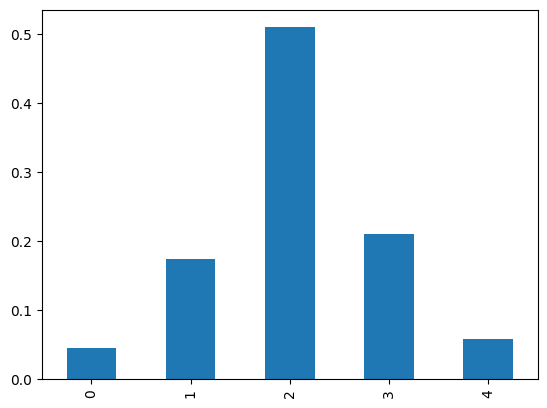

In [ ]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

In [ ]:
raw_df.Phrase.value_counts(normalize=True)

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .    0.000006
exist without the precedent of Yiddish theater , whose jolly , fun-for-fun 's - sake communal spirit goes to the essence of Broadway                                                            0.000006
American musical comedy as we                                                                                                                                                                   0.000006
American musical comedy                                                                                                                                                                         0.000006
as we                                                                                                                                                                                           0.00

Let's going to display the values of the Sentiment column in percentage values.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
sentiment_count = raw_df.Sentiment.value_counts(dropna=False)
sentiment_count

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [ ]:
from importlib import reload
plt=reload(plt)

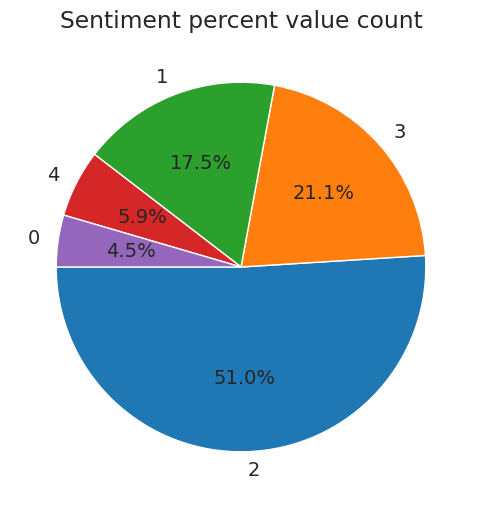

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Sentiment percent value count')
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%', startangle=180);

Summarize your insights and learnings from the dataset below:

* Taking into account that the sentiment tags in this database are:

0 - negative

1 - something negative

2 - neutral

3 - something positive

4 - positive

We can see in the graphs that the highest percentage is presented by label 2 (neutral) with 51.0% followed by label 3 (something positive) with 21.1% and label 1 (something negative) with 17.5%, followed by label 4(positive) with 5.9%, ending with 4.5% values on label 0 (negative).


## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [ ]:
import nltk

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stemmer = SnowballStemmer(language= 'english')

In [ ]:
stemmer.stem('going')

'go'

In [ ]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [ ]:
tokenize('the reality of de live is try to live in your own terms')

['the',
 'realiti',
 'of',
 'de',
 'live',
 'is',
 'tri',
 'to',
 'live',
 'in',
 'your',
 'own',
 'term']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
', '.join(english_stopwords[:115])

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some"

In [ ]:
select_stopwords = english_stopwords[:115]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words=select_stopwords,
                             ngram_range=(1, 2),
                             max_features=2000)

In [ ]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x79f2ea042050>)

In [ ]:
len(vectorizer.vocabulary_)

2000

In [ ]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
inputs = vectorizer.transform(raw_df.Phrase)

In [ ]:
inputs.shape

(156060, 2000)

In [ ]:
inputs.toarray()[0][:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
test_inputs= vectorizer.transform(test_df.Phrase)

In [ ]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 473102 stored elements in Compressed Sparse Row format>

In [ ]:
TRAIN_SIZE = 110_000

In [ ]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [ ]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [ ]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [ ]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
MAX_ITER = 1000

In [ ]:
model = LogisticRegression(max_iter=MAX_ITER)

In [ ]:
model.fit(train_inputs, train_targets)

LogisticRegression(max_iter=1000)

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [ ]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.6391909090909091

In [ ]:
val_preds = model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, val_preds)

0.5792661745549283

### Study Predictions on Sample Inputs

In [ ]:
small_df = raw_df.sample(20)

In [ ]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
16142,16143,695,every attempt,2
82597,82598,4264,his star,2
21670,21671,969,happens to send you off in different direction,2
135531,135532,7319,Zucker Brothers\/Abrahams films,2
62668,62669,3170,the insights,2
112239,112240,5961,If you ever wondered what it would be like to ...,4
46412,46413,2257,not only one of the best gay love stories ever...,2
67335,67336,3417,The most compelling performance,4
2315,2316,89,shows us a slice of life that 's very differen...,3
89898,89899,4679,has as much right,2


In [ ]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [ ]:
small_inputs.shape

(20, 2000)

In [ ]:
small_preds = model.predict(small_inputs)

In [ ]:
small_preds

array([2, 2, 2, 2, 2, 2, 4, 3, 2, 2, 3, 1, 3, 4, 2, 4, 2, 1, 3, 3])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score



In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 181514 stored elements in Compressed Sparse Row format>

In [ ]:
test_preds = model.predict(test_inputs)

In [ ]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
sub_df.Sentiment = test_preds

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [ ]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,3
156066,3
156067,3
156068,2
156069,3


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional:
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips:

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1 -Naives Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model1 = MultinomialNB(class_prior=(0.05, 0.2, 0.5, 0.2, 0.05), force_alpha=True)

In [ ]:
model1.fit(train_inputs, train_targets)

MultinomialNB(class_prior=(0.05, 0.2, 0.5, 0.2, 0.05), force_alpha=True)

Now we check the RMSE making prediction the model.

In [ ]:
model1_train_preds = model1.predict(train_inputs)
model1_train_rmse = mean_squared_error(train_targets, model1_train_preds, squared=False)
model1_val_preds = model1.predict(val_inputs)
model1_val_rmse = mean_squared_error(val_targets, model1_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model1_train_rmse, model1_val_rmse))

Train RMSE: 0.776314135104879, Validation RMSE: 0.8281179977214834


Let check the accurancy of the model.


In [ ]:
accuracy_train_model1= accuracy_score(train_targets, model1.predict(train_inputs))

In [ ]:
accuracy_val_model1=accuracy_score(val_targets, model.predict(val_inputs))

In [ ]:
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model1,accuracy_val_model1))

 The accuracy for training set by tree is 0.5882% and 
 for validation set is 0.5793%


### Model 2 -DecisionTreeClassifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2 = DecisionTreeClassifier(random_state=42)

In [ ]:
model2.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

Now we check the RMSE making prediction the model

In [ ]:
model2_train_preds = model2.predict(train_inputs)
model2_train_rmse = mean_squared_error(train_targets, model2_train_preds, squared=False)
model2_val_preds = model2.predict(val_inputs)
model2_val_rmse = mean_squared_error(val_targets, model2_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model2_train_rmse, model2_val_rmse))

Train RMSE: 0.52116129068561, Validation RMSE: 0.9532493507963944


Let check the accurancy of the model.


In [ ]:
accuracy_train_model2 = accuracy_score(train_targets, model2.predict(train_inputs))
accuracy_val_model2 = accuracy_score(val_targets, model2.predict(val_inputs))
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model2*100,accuracy_val_model2*100))

 The accuracy for training set by tree is 79.0273% and 
 for validation set is 52.8311%


Let's try to train the model with hyperparameters, since in other machine learning models, there are several hyperparameters that we can adjust to adjust the capacity of the model and reduce overfitting, for that Let's define a helper function test_params which can test the given value of one or more hyperparameters, and test_param_and_plot for plot the fit.

In [ ]:
def test_params(**params):
    model = DecisionTreeClassifier(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [ ]:
def test_param_and_plot(param_name, param_values):
  train_errors, val_errors = [], []
  for value in param_values:
    params = {param_name: value}
    train_rmse, val_rmse = test_params(**params)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)
  plt.figure(figsize=(10,6))
  plt.title('Overfitting curve:' + param_name)
  plt.plot(param_values, train_errors, 'b-o')
  plt.plot(param_values, val_errors, 'r-o')
  plt.xlabel(param_name)
  plt.ylabel('RMSE')
  plt.legend(['Training', 'Validation'])


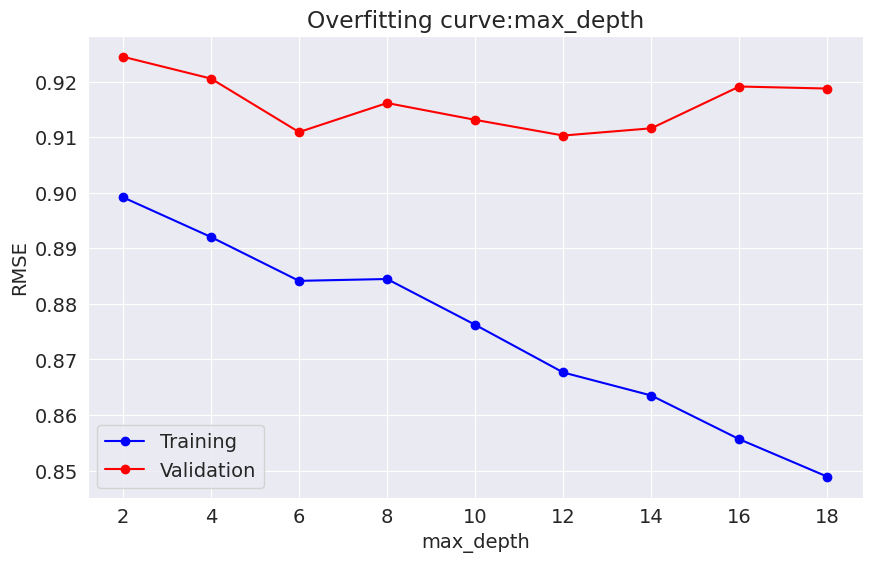

In [ ]:
test_param_and_plot('max_depth', range(2, 20, 2))

As we can see in the graph with the max-depth hyperparameter, the best value where the model is trained comparing it with the validation is 6, after there we can see how the model is overfitting.

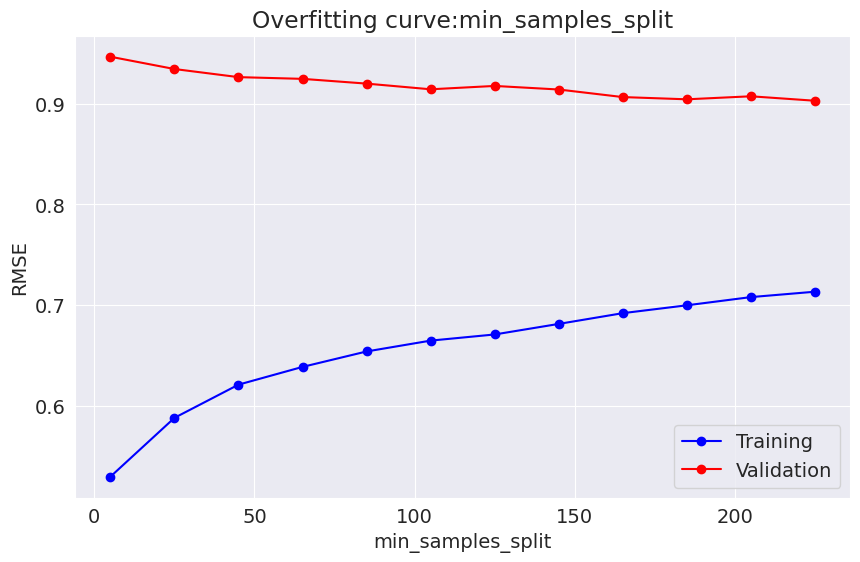

In [ ]:
test_param_and_plot('min_samples_split',range(5, 226, 20))


As we can see in the graph with the min_samples_split hyperparameter, the best value where the model is trained comparing it with the validation is 200, after there we can see how the model is overfitting.

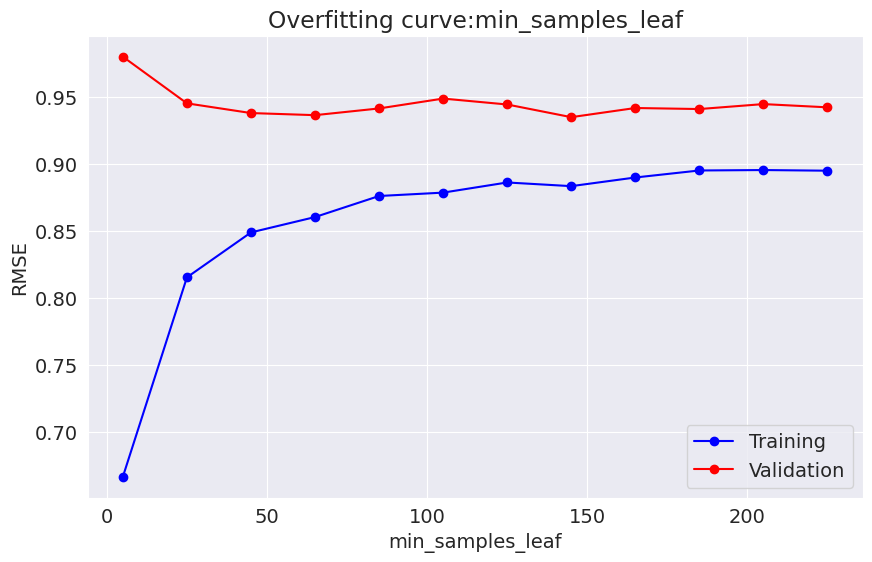

In [ ]:
test_param_and_plot('min_samples_leaf', range(5, 226, 20))

As we can see in the graph with the min_samples_leaf hyperparameter, the best value where the model is trained comparing it with the validation is 150, after there we can see how the model is overfitting

Now let's trainig the model again whith the the values of the parameters.


In [ ]:
model02 = DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_split=200, min_samples_leaf=150  )

In [ ]:
model02.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=150, min_samples_split=200,
                       random_state=42)

Now we check the RMSE making prediction the model


In [ ]:
model02_train_preds = model02.predict(train_inputs)
model02_train_rmse = mean_squared_error(train_targets, model02_train_preds, squared=False)
model02_val_preds = model02.predict(val_inputs)
model02_val_rmse = mean_squared_error(val_targets, model02_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model02_train_rmse, model02_val_rmse))

Train RMSE: 0.9041067917613996, Validation RMSE: 0.9261483465829972


Let check the accurancy of the model.


In [ ]:
accuracy_train_model02 = accuracy_score(train_targets, model02.predict(train_inputs))
accuracy_val_model02 = accuracy_score(val_targets, model02.predict(val_inputs))
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model02,accuracy_val_model02))

 The accuracy for training set by tree is 0.5267% and 
 for validation set is 0.5059%


The model inprove a little that we can see in the ferst time when we traing there was many diferrence bentween the training and the validation, nowwe can see the the diferences is not much. When the diffrence is to much is because the the model was overfittting.

### Model 3 -XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
model3 = xgb.XGBClassifier()

In [ ]:
model3.fit(train_inputs, train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Now we check the RMSE making prediction the model


In [ ]:
model3_train_preds = model3.predict(train_inputs)
model3_train_rmse = mean_squared_error(train_targets, model3_train_preds, squared=False)
model3_val_preds = model3.predict(val_inputs)
model3_val_rmse = mean_squared_error(val_targets, model3_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model3_train_rmse, model3_val_rmse))

Train RMSE: 0.7422263805605402, Validation RMSE: 0.8541360635816316


Let check the accurancy of the model.Let check the accurancy of the model

In [ ]:
accuracy_train_model3 = accuracy_score(train_targets, model3.predict(train_inputs))
accuracy_val_model3 = accuracy_score(val_targets, model3.predict(val_inputs))
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model3,accuracy_val_model3))

 The accuracy for training set by tree is 0.6310% and 
 for validation set is 0.5524%


Let's try to train the model with hyperparameters auxiliary function test_params which can test the given value of one or more hyperparameters and test_param_and_plot to plot the fit.


In [ ]:
def test_params(**params):
    model = xgb.XGBClassifier(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [ ]:
def test_param_and_plot(param_name, param_values):
  train_errors, val_errors = [], []
  for value in param_values:
    params = {param_name: value}
    train_rmse, val_rmse = test_params(**params)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)
  plt.figure(figsize=(10,6))
  plt.title('Overfitting curve:' + param_name)
  plt.plot(param_values, train_errors, 'b-o')
  plt.plot(param_values, val_errors, 'r-o')
  plt.xlabel(param_name)
  plt.ylabel('RMSE')
  plt.legend(['Training', 'Validation'])

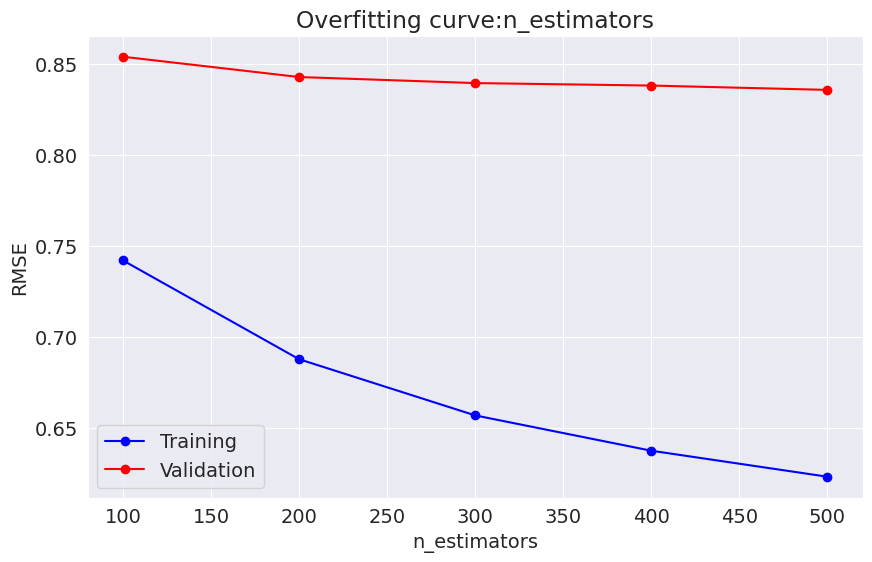

In [ ]:
test_param_and_plot('n_estimators', [100, 200, 300, 400, 500])

As we can see in the graph with the n_estimators hyperparameter, the best value where the model is trained comparing it with the validation is 100, after there we can see how the model is overfitting.

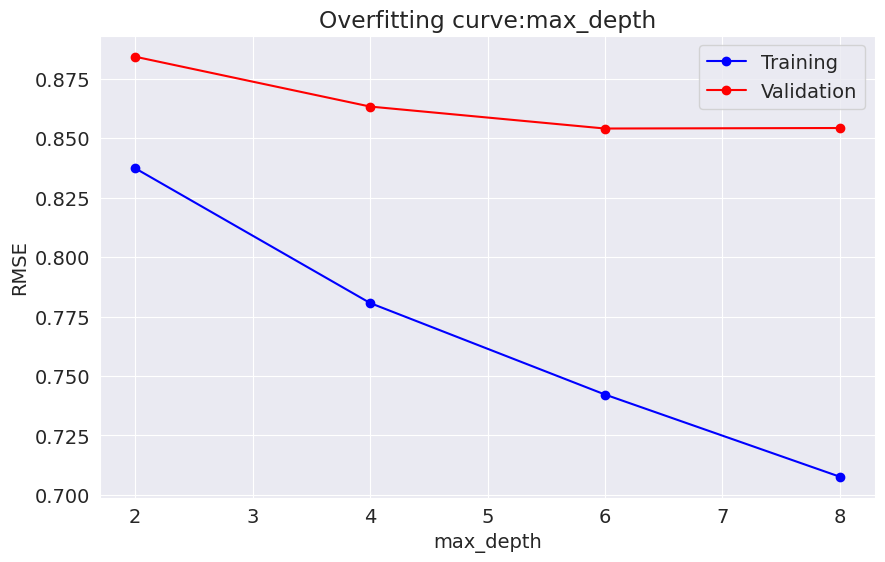

In [ ]:
test_param_and_plot('max_depth', range(2, 10, 2))

As we can see in the graph with the max-depth hyperparameter, the best value where the model is trained comparing it with the validation is 2, after there we can see how the model is overfitting.

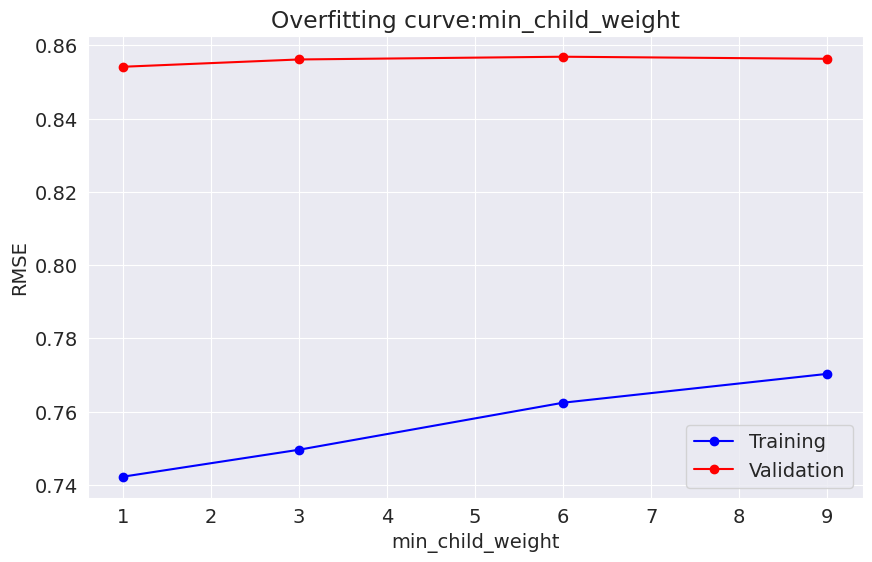

In [ ]:
test_param_and_plot('min_child_weight', [1, 3, 6, 9])

As we can see in the graph with the min_child_weigh hyperparameter, the best value where the model is trained comparing it with the validation is 1, after there we can see how the model is overfitting.



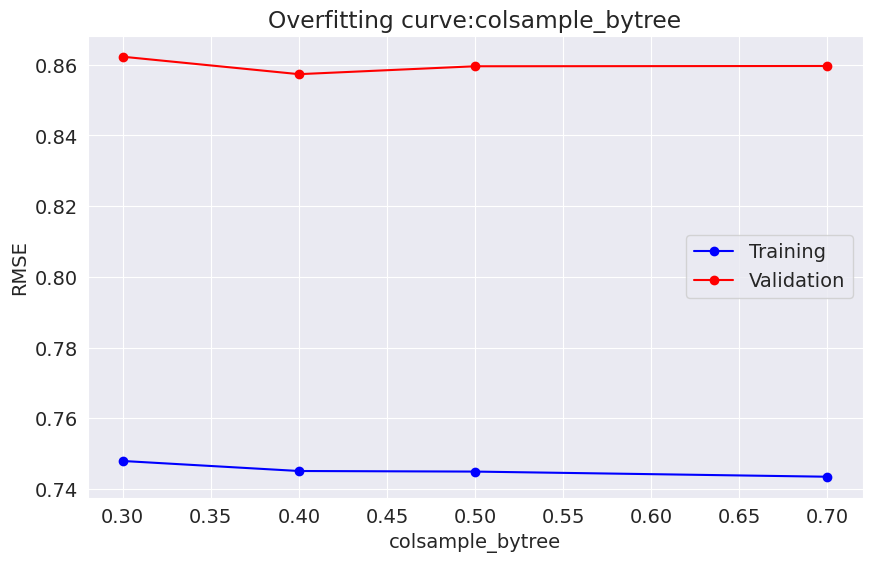

In [ ]:
test_param_and_plot('colsample_bytree', [0.3, 0.4, 0.5 , 0.7])

As we can see in the graph with the colsample_bytree hyperparameter, the best value where the model is trained comparing it with the validation is 0.40, after there we can see how the model is overfitting.

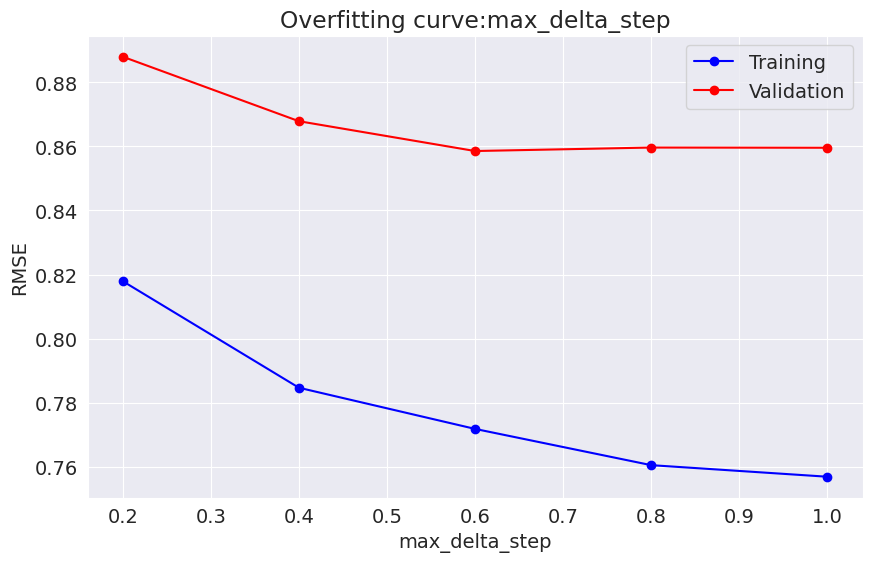

In [ ]:
test_param_and_plot('max_delta_step', [0.2, 0.4, 0.6, 0.8, 1])

As we can see in the graph with the max_delta_step hyperparameter, the best value where the model is trained comparing it with the validation is 0.4, after there we can see how the model is overfitting.

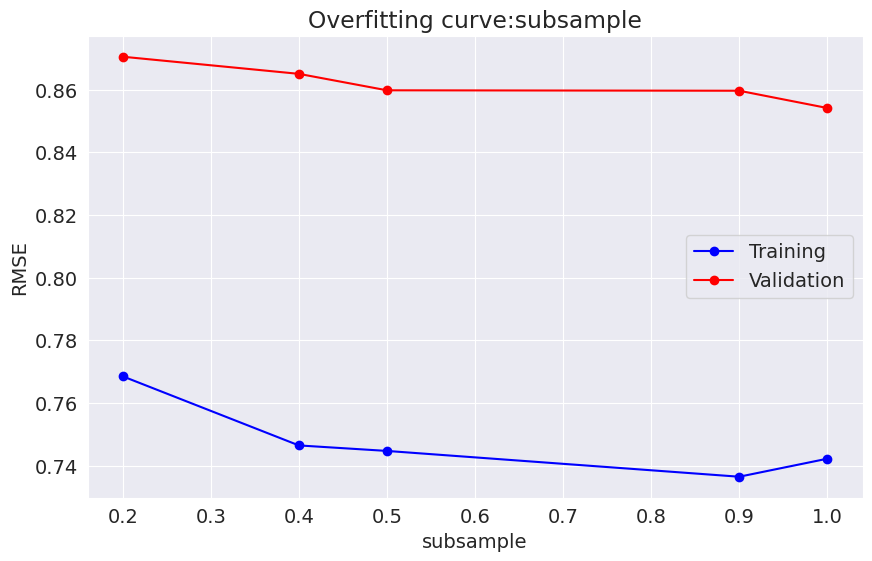

In [ ]:
test_param_and_plot('subsample', [0.2, 0.4, 0.5 , 0.9, 1])

As we can see in the graph with the subsample hyperparameter, the best value where the model is trained comparing it with the validation is 0.2, after there we can see how the model is overfitting.



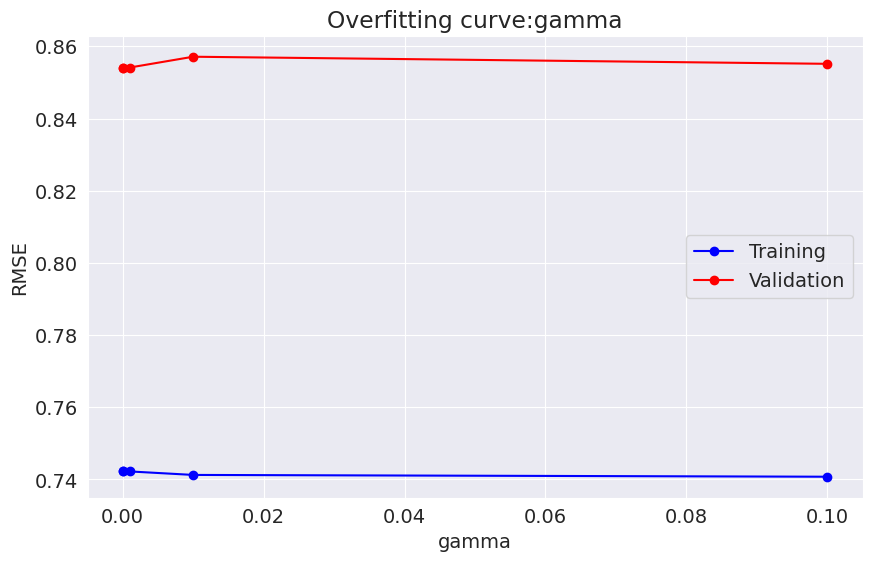

In [ ]:
test_param_and_plot('gamma', [0.00001, 0.0001, 0.001, 0.01, 0.1])

As we can see in the graph with the gamma hyperparameter, the best value where the model is trained comparing it with the validation is 0.00001.

Now let's trainig the model again whith the the values of the parameters.

In [ ]:
model03 = xgb.XGBClassifier(n_estimators = 100, max_depth = 2,learning_rate = 0.1,
                      gamma = 0.00001, min_child_weight = 1,objective='binary:logistic',
                      colsample_bytree = 0.4, subsample = 0.4, max_delta_step = 0.4,
                      n_jobs = -1, random_state = 100)
model03.fit(train_inputs, train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1e-05, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0.4, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

Now we check again the RMSE making prediction the model

In [ ]:
model03_train_preds = model03.predict(train_inputs)
model03_train_rmse = mean_squared_error(train_targets, model03_train_preds, squared=False)
model03_val_preds = model03.predict(val_inputs)
model03_val_rmse = mean_squared_error(val_targets, model03_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model03_train_rmse, model03_val_rmse))

Train RMSE: 0.883392222165114, Validation RMSE: 0.906746077933632


Let check again the accurancy of the model.Let check the accurancy of the model.



In [ ]:
accuracy_train_model03 = accuracy_score(train_targets, model03.predict(train_inputs))
accuracy_val_model03 = accuracy_score(val_targets, model03.predict(val_inputs))
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model2,accuracy_val_model2))

 The accuracy for training set by tree is 0.7903% and 
 for validation set is 0.5283%


### We will create a dataframe with the summary of train model and RMSE of all models


In [ ]:
MultinomialNB = XGBClassifier = {'train_rmse' : model1_train_rmse,
       'val_rmse' : model1_val_rmse,
        'accuracy_train' : accuracy_train_model1,
       'accuracy_val' : accuracy_val_model1}

DecisionTreeClassifier = {'train_rmse' : model02_train_rmse,
       'val_rmse' : model02_val_rmse,
        'accuracy_train' : accuracy_train_model02,
       'accuracy_val' : accuracy_val_model02}

XGBClassifier = {'train_rmse' : model03_train_rmse,
       'val_rmse' : model03_val_rmse,
        'accuracy_train' : accuracy_train_model03,
       'accuracy_val' : accuracy_val_model03}

In [ ]:
sumary_prediction = pd.DataFrame([MultinomialNB, DecisionTreeClassifier, XGBClassifier ],
                                 index = ['MultinomialNB', 'DecisionTreeClassifier', 'XGBClassifier' ])
sumary_prediction

,train_rmse,val_rmse,accuracy_train,accuracy_val
MultinomialNB,0.776314,0.828118,0.588164,0.579266
DecisionTreeClassifier,0.904107,0.926148,0.526655,0.505862
XGBClassifier,0.883392,0.906746,0.525991,0.502605


In [ ]:
test_model_preds = model1.predict(test_inputs)

In [ ]:
sub_df.Sentiment = test_model_preds

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
sub_df.to_csv('MultinomialNB_submission.csv', index=None)

In [ ]:
!head MultinomialNB_submission.csv

PhraseId,Sentiment
156061,2
156062,2
156063,2
156064,2
156065,2
156066,3
156067,3
156068,3
156069,3


Best Model:

MultinomialNB

Here the Kaggle score screenshot: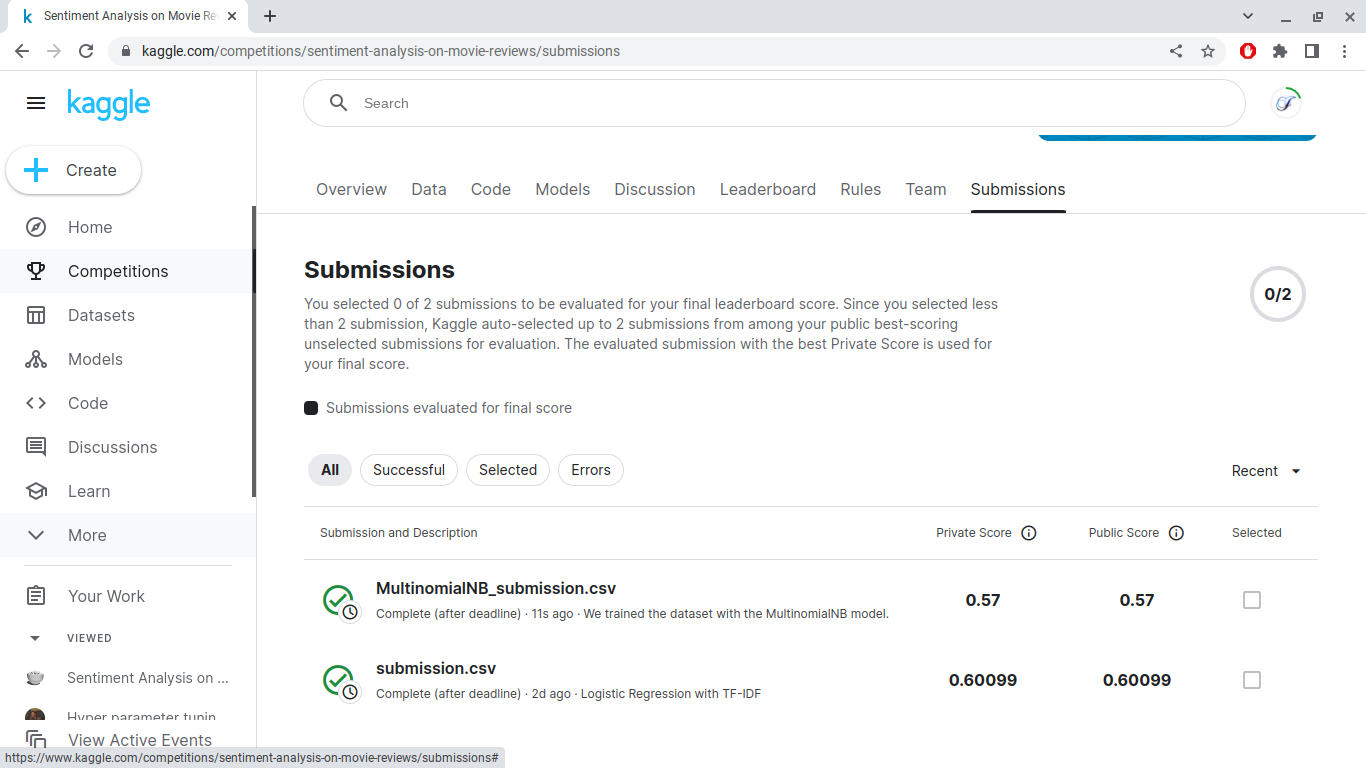

As a conclusion we can see that the MultinomialNB model of the last three that we trained is the one that has a better precision score than the DecisionTree and XGBoost models, however the precision score is still somewhat low, I suppose that due to the fact of vectorizing the values of the training dataset and the validation dataset would need some optimization to improve the score.

## References of this notebook
* Keggle.com: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews

* DecisionTreeClassifier: https://scikit-learn.org/0.15/modules/generated/sklearn.tree.DecisionTreeClassifier.html

* XGBoost : https://xgboost.readthedocs.io/en/stable/parameter.html

* Gradient Boosting with XGBoost :https://jovian.com/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost#C121

* Home-Credict-Notebook: https://jovian.com/luis-e-florenzan/home-credict


## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
